In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_excel('heart_disease.xlsx',sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Handle missing values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [8]:
# Convert boolean columns to string before encoding
df['fbs'] = df['fbs'].astype(str)
df['exang'] = df['exang'].astype(str)

In [9]:
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Ensure all features are numeric
df = df.apply(pd.to_numeric, errors='coerce')

<Figure size 1200x600 with 0 Axes>

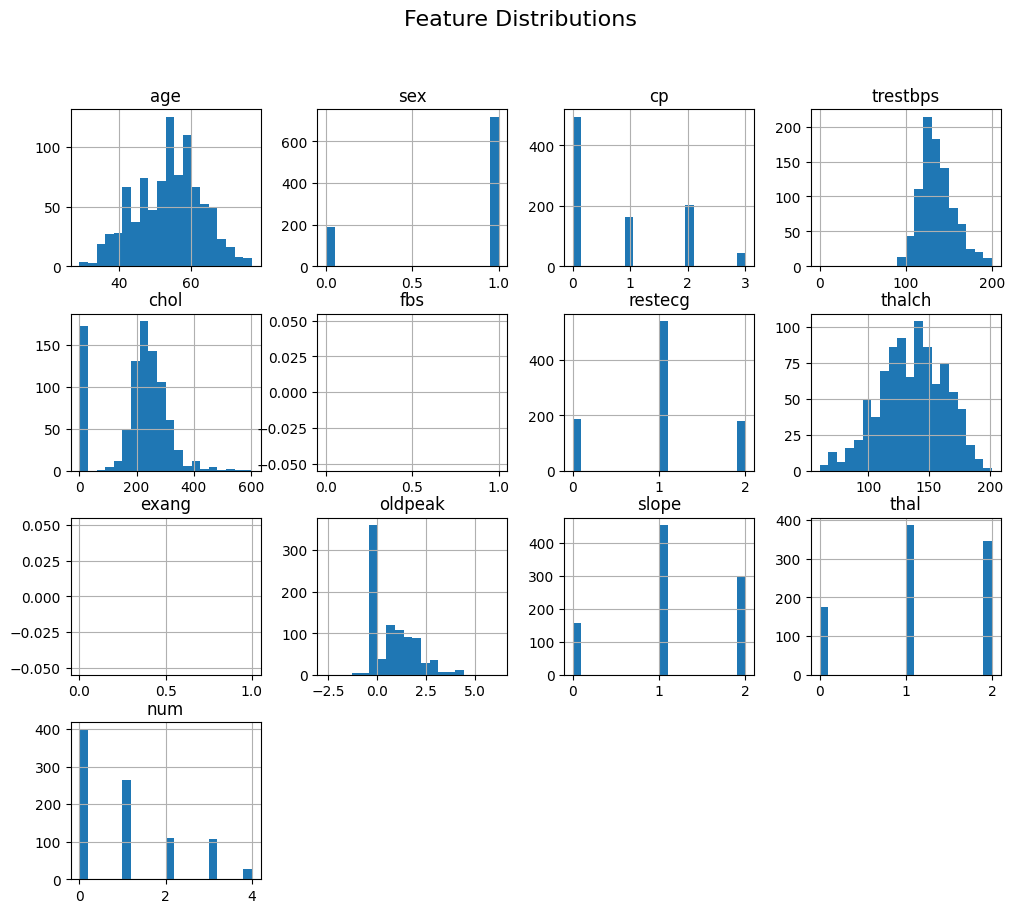

In [11]:
# Histogram
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

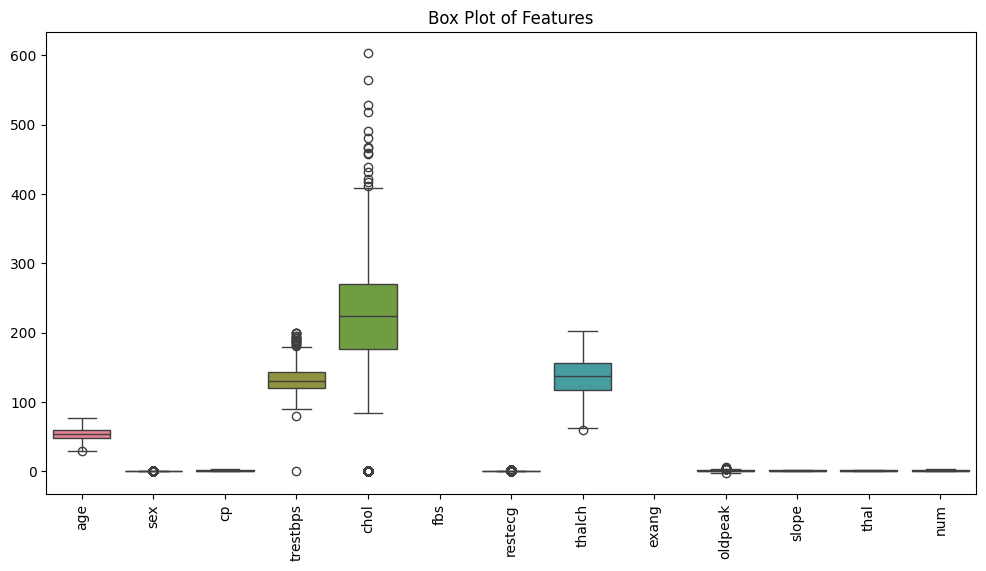

In [12]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()

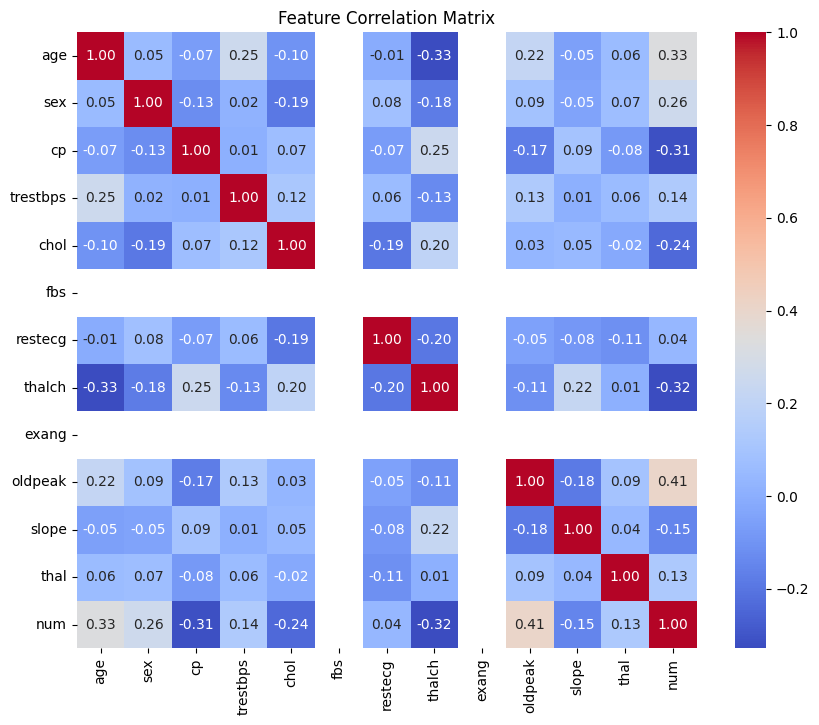

In [13]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [14]:
# Define features and target
features = df.drop(columns=['num'])  # Features
target = df['num']  # Target variable

In [15]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [16]:
# Ensure all features are numeric before scaling
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [17]:
# Scale numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [18]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Make predictions
y_pred = dt.predict(x_test)

In [20]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.09340659340659341
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        22
           3       0.09      1.00      0.17        17
           4       0.00      0.00      0.00         6

    accuracy                           0.09       182
   macro avg       0.02      0.20      0.03       182
weighted avg       0.01      0.09      0.02       182

Confusion Matrix:
 [[ 0  0  0 89  0]
 [ 0  0  0 48  0]
 [ 0  0  0 22  0]
 [ 0  0  0 17  0]
 [ 0  0  0  6  0]]


In [21]:
# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:
# Train optimized model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(x_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))

Optimized Accuracy: 0.489010989010989


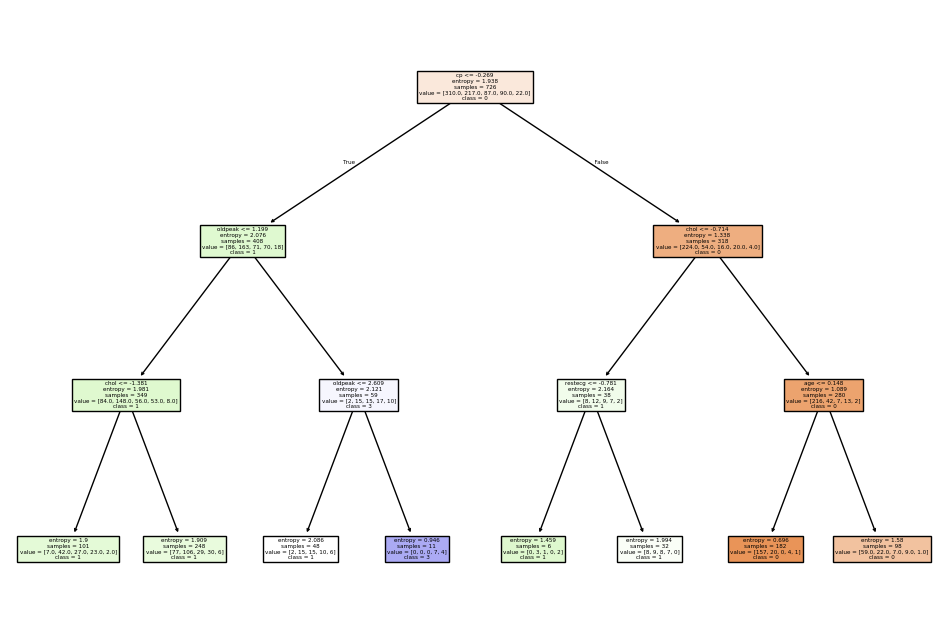

In [23]:
# Get unique class names dynamically
class_names = [str(cls) for cls in sorted(target.unique())]

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=features.columns, class_names=class_names, filled=True)
plt.show()

## Questions

1. ### Common Hyperparameters of Decision Tree Models: ###  
   - **`max_depth`**: Limits the depth of the tree to prevent overfitting.  
   - **`min_samples_split`**: Minimum samples required to split a node; higher values reduce overfitting.  
   - **`min_samples_leaf`**: Minimum samples required in a leaf node; prevents very small leaves.  
   - **`criterion`** (`gini` or `entropy`): Defines how the split quality is measured; `gini` is faster, while `entropy` provides more information gain.  
   - **`max_features`**: Limits the number of features considered for a split, reducing overfitting.  

2. ### Label Encoding vs. One-Hot Encoding: ###  
   - **Label Encoding**: Assigns a unique integer to each category (e.g., Red → 0, Green → 1, Blue → 2). It is suitable for ordinal data but can mislead models when used for non-ordinal data.  
   - **One-Hot Encoding**: Creates separate binary columns for each category (e.g., Red → [1,0,0], Green → [0,1,0], Blue → [0,0,1]). It avoids ordinal relationships but increases dimensionality.